In [1]:
import webbrowser
import urllib.request
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

필요 모듈 import. 

# 데이터 추출

In [11]:
data = pd.read_csv('자동차 에너지소비효율등급 인증 현황_190903..csv', encoding = 'CP949')

경차만 추출

In [12]:
data[data['배기량']<1000]
tiny=data[data['배기량']<1000]

In [13]:
tiny_mpg=tiny[['모델명', '제조사','유종', '복합연비']]

In [14]:
tiny_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 392 to 2086
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     127 non-null    object 
 1   제조사     127 non-null    object 
 2   유종      127 non-null    object 
 3   복합연비    127 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.0+ KB


In [15]:
tiny_mpg.describe()

,복합연비
count,127.000000
mean,10.041732
std,13.891310
min,1.600000
25%,4.050000
50%,5.600000
75%,13.200000
max,96.200000


In [16]:
tiny_mpg[tiny_mpg['복합연비']>10]

,모델명,제조사,유종,복합연비
392,"스토닉 1.0 T-GDI 7DCT (15""타이어)",기아,휘발유,13.7
395,"스토닉 1.0 T-GDI 7DCT (17""타이어)",기아,휘발유,13.5
1933,넥쏘 수소전기차(17인치타이어),현대,수소,96.2
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,91.7
1964,스파크 1.0,한국지엠,휘발유,15.0
1965,스파크 1.0,한국지엠,휘발유,15.0
1966,스파크 밴 1.0,한국지엠,휘발유,15.0
1967,스파크 밴 1.0,한국지엠,휘발유,15.0
1968,"레이 1.0가솔린 (PE, 15인치 타이어)",기아,휘발유,12.7
1969,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)",기아,휘발유,13.0


경차들의 복합 연비는 평균 10.0으로 나타났다. 평균보다 상위에 해당하는 모델들은 다음과 같다.

In [18]:
tiny_mpg.sort_values(by='복합연비',ascending=False).head(60)

,모델명,제조사,유종,복합연비
1933,넥쏘 수소전기차(17인치타이어),현대,수소,96.2
2082,넥쏘 수소전기차(19인치타이어),현대,수소,93.7
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,91.7
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,16.2
2009,모닝 1.0가솔린 밴형 (2015년형),기아,휘발유,16.2
1988,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,16.0
1991,모닝(JA) 1.0가솔린 (15),기아,휘발유,16.0
1995,스파크 1.0 CVT S&S,한국지엠,휘발유,15.4
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,15.4
1992,모닝(JA) 1.0가솔린 (15),기아,휘발유,15.4


In [19]:
tiny_mpg.sort_values(by='복합연비',ascending=False).tail(20)

,모델명,제조사,유종,복합연비
2033,재규어 I-PACE EV400,재규어,전기,3.5
2078,파워프라자 라보 ev PEACE,한국지엠,전기,3.5
2044,Model X 100D,테슬라,전기,3.4
2051,Model X 100D,테슬라,전기,3.4
2042,Model X 75D,테슬라,전기,3.4
2043,Model X 100D,테슬라,전기,3.4
2041,Model X 100D,테슬라,전기,3.4
2045,Model X 75D,테슬라,전기,3.4
2046,Model X 75D,테슬라,전기,3.4
2047,Model X 75D,테슬라,전기,3.4


# 경차 분석

In [2]:
dft=pd.read_csv('경차 수정.csv', encoding='utf-8')
n=len(dft)
n

30

사전에 추출한 대상 자료 호출 및 변수 개수 확인.

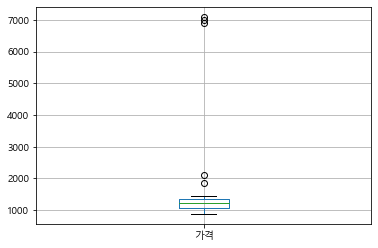

In [3]:
boxplot=dft.boxplot(column=['가격'])
plt.show()

이상치가 유독 높이 나온 것을 확인한 결과, 수소차인 것을 확인하였다. 수소차의 경우, 전국에 운영 중인 충전소가 26곳인 수준으로 나타나 경제성과 접근성이 떨어진다고 판단하여 제거하였다. 나머지 2개의 이상치는 단순 가격이 높은 경차 종류인 것에 불과하여 그대로 유지하였다.

In [4]:
dft_x=dft.drop([17,18,19])

이후 해당 데이터 프레임으로 회귀분석을 실시하였다.

In [5]:
x=np.array(dft_x['복합연비'])
y=np.array(dft_x['가격'])
p=1

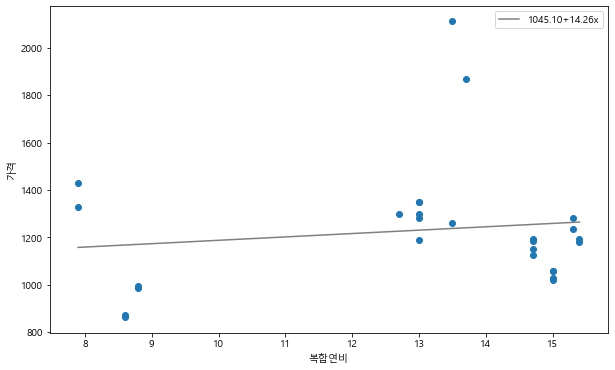

In [6]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [7]:
formula='복합연비~가격'
result=smf.ols(formula,dft_x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Thu, 02 Jul 2020   Prob (F-statistic):              0.485
Time:                        16:16:07   Log-Likelihood:                -63.399
No. Observations:                  27   AIC:                             130.8
Df Residuals:                      25   BIC:                             133.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2341      2.450      4.586      0.000       6.188      16.280
가격             0.0014      0.002      0.709      0.485      -0.003       0.005
==============================================================================
Omnibus:                        4.202   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.738
Skew:                          -0.861   Prob(JB):                        0.154
Kurtosis:                       2.401   Cond. No.                     6.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
corr=stats.pearsonr(dft_x.복합연비, dft_x.가격)
corr

(0.14038069216400967, 0.4849309788293205)

분석 결과 약한 양의 상관관계가 나왔으며, p값은 0.05를 크게 초과하는 것으로 나왔다. 따라서 복합연비와 차량의 가격간에는 상관관계가 없는 것으로 나타났다.

# 결과 분석

차량의 가격 설정은 복합연비 뿐만 아니라 차량에 설치된 다양한 부품이나 디자인, 브랜드 파워 등 다양한 요소가 결합되는 사치재적인 성격이 있다.    

차량은 본질적으로 운송수단인 만큼, 연비와 가격의 상관관계가 클 것이라고 가정하고 진행하였으나, 실제로는 그렇지 않다는 결과가 나왔다.   

이를 바탕으로 차량의 가격 결정 요소에는 연비의 비중이 생각보다 크지 않다는 점을 확인할 수 있었으며, 차량 구매 고려 요인 선정에 있어서도 여러 요소를 고려해야 보다 더 정확한 근사치를 얻을 수 있을 것으로 보인다.
